In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/7k-indian-famous-women/data.csv


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('/kaggle/input/7k-indian-famous-women/data.csv')
data.head()

,Full Name,Description,Job,Education Place,Native Language,Country,Father,Mother,Spouse,Birth Date,Death Date,Birth Place,Death Place,Death Method,Death Reason
0,Shanta Shelke,Marathi Poet And Writer,Poet,NaN,NaN,India,NaN,NaN,NaN,1922-10-19,2002-06-06,Pune,NaN,Natural Causes,Cancer
1,Sonali Bendre,Indian Actress And Model,Model,Kendriya Vidyalaya,Hindi,India,NaN,NaN,Goldie Behl,1975-01-01,NaN,Mumbai,NaN,NaN,NaN
2,Indira Gandhi,Indian Prime Minister And Politician (1917-1984),Politician,Somerville College,NaN,India,Jawaharlal Nehru,Kamala Nehru,Feroze Gandhi,1917-11-19,1984-10-31,Allahabad,New Delhi,Homicide,Ballistic Trauma
3,Baby Halder,Indian Housemaid And Author,Writer,NaN,Bengali,India,NaN,NaN,NaN,1973-06-19,NaN,Kashmir,NaN,NaN,NaN
4,Genelia D'Souza,Indian Actress,Actor,"St. Andrew'S College, Mumbai",NaN,India,NaN,NaN,Riteish Deshmukh,1982-08-05,NaN,Mumbai,NaN,NaN,NaN


In [4]:
data.describe()

,Full Name,Description,Job,Education Place,Native Language,Country,Father,Mother,Spouse,Birth Date,Death Date,Birth Place,Death Place,Death Method,Death Reason
count,7686,7639,7575,1676,573,7686,360,214,872,6322,1155,5110,620,130,176
unique,7577,2096,349,499,17,26,314,185,846,4723,1033,1073,184,5,54
top,Rajwinder Kaur,Indian Actress,Actor,University Of Calcutta,Odia,India,Deenanath Mangeshkar,Manik Varma,Alyque Padamsee,2000-00-00,1990-01-01,Mumbai,Mumbai,Natural Causes,Myocardial Infarction
freq,3,1639,2534,150,252,7472,4,3,3,32,6,651,106,75,28


In [5]:
data.shape

(7686, 15)

In [6]:
data.drop(columns =['Education Place', 'Native Language','Father', 'Mother', 'Spouse'], inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7686 entries, 0 to 7685
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Full Name     7686 non-null   object
 1   Description   7639 non-null   object
 2   Job           7575 non-null   object
 3   Country       7686 non-null   object
 4   Birth Date    6322 non-null   object
 5   Death Date    1155 non-null   object
 6   Birth Place   5110 non-null   object
 7   Death Place   620 non-null    object
 8   Death Method  130 non-null    object
 9   Death Reason  176 non-null    object
dtypes: object(10)
memory usage: 600.6+ KB


In [8]:
data.duplicated().sum()
data.drop_duplicates(inplace= True)

In [9]:
data.isnull().sum()
data.dropna(how='any', inplace= True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 2 to 7380
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Full Name     71 non-null     object
 1   Description   71 non-null     object
 2   Job           71 non-null     object
 3   Country       71 non-null     object
 4   Birth Date    71 non-null     object
 5   Death Date    71 non-null     object
 6   Birth Place   71 non-null     object
 7   Death Place   71 non-null     object
 8   Death Method  71 non-null     object
 9   Death Reason  71 non-null     object
dtypes: object(10)
memory usage: 6.1+ KB


In [11]:
data.nunique()

Full Name       71
Description     50
Job             20
Country          3
Birth Date      71
Death Date      71
Birth Place     54
Death Place     28
Death Method     4
Death Reason    24
dtype: int64

In [12]:
data[ 'Death Method'].unique()

array(['Homicide', 'Natural Causes', 'Suicide', 'Accident'], dtype=object)

In [13]:
data['Death Reason'].unique()

array(['Ballistic Trauma', 'Myocardial Infarction', 'Liver Cirrhosis',
       'Hanging', 'Cancer', 'Cardiac Arrest', 'Aircraft Crash',
       'Meningoencephalitis', 'Tetanus', 'Fall', 'Leukemia',
       'Uterine Cancer', 'Pancreatic Cancer', 'Assassination',
       'Lung Cancer', 'Pneumonia', 'Kidney Failure', 'Drowning',
       'Smallpox', 'Covid-19', 'Colorectal Cancer', 'Breast Cancer',
       'Myeloproliferative Disorders', 'Kidney Disease'], dtype=object)

In [14]:
data.isnull().sum()

Full Name       0
Description     0
Job             0
Country         0
Birth Date      0
Death Date      0
Birth Place     0
Death Place     0
Death Method    0
Death Reason    0
dtype: int64

In [15]:
data.isnull().sum()

Full Name       0
Description     0
Job             0
Country         0
Birth Date      0
Death Date      0
Birth Place     0
Death Place     0
Death Method    0
Death Reason    0
dtype: int64

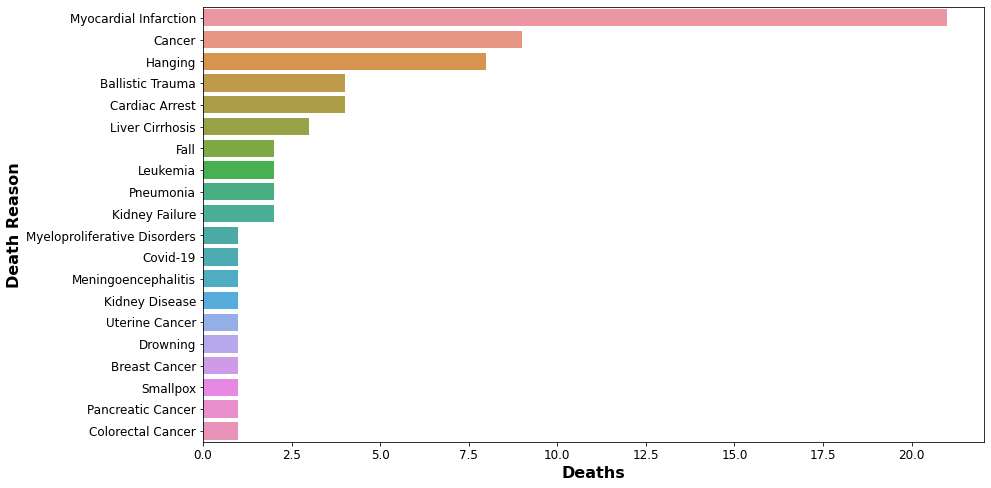

In [16]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(14,8))
sns.countplot(y='Death Reason', data=data, order=data['Death Reason'].value_counts().index[:20])
plt.xlabel('Deaths', weight='bold', fontsize=16)
plt.ylabel('Death Reason', weight='bold', fontsize=16)
plt.show()

<AxesSubplot:xlabel='Death Method', ylabel='count'>

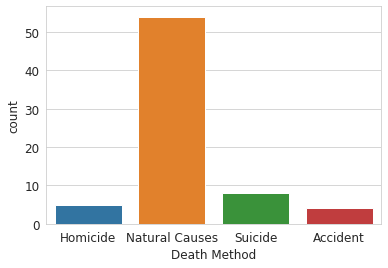

In [17]:
sns.set_style('whitegrid')
sns.countplot(x= 'Death Method',data=data)

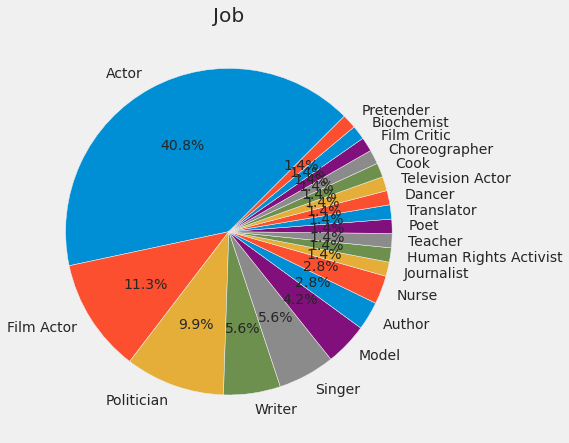

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Job")
g = plt.pie(data.Job.value_counts(), labels=data.Job.value_counts().index,autopct='%1.1f%%', startangle=45)
plt.show()